# Red convolucional
_Por: Alfredo Villegas_

En el siguiente trabajo se implementará un modelo de clasificación de imágenes simple utilizando una CNN en un conjunto de datos a escoger.

La primera celda importa las librerías necesarias para trabajar con TensorFlow y Keras, así como las librerías Numpy y Matplotlib. Además importamos las funciones personales.

In [7]:
import tensorflow as tf
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
from numpy.random import Generator

import matplotlib.pyplot as plt

from kminst_models import kminst_model

En esta celda, se cargan los conjuntos de datos de entrenamiento y prueba para el problema de reconocimiento de dígitos en el dataset KMNIST.

In [8]:
train_images = np.load('kminst/kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kminst/kmnist-train-labels.npz')['arr_0']
test_images = np.load('kminst/kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kminst/kmnist-test-labels.npz')['arr_0']


Se muestra un ejemplo de una de las imágenes:

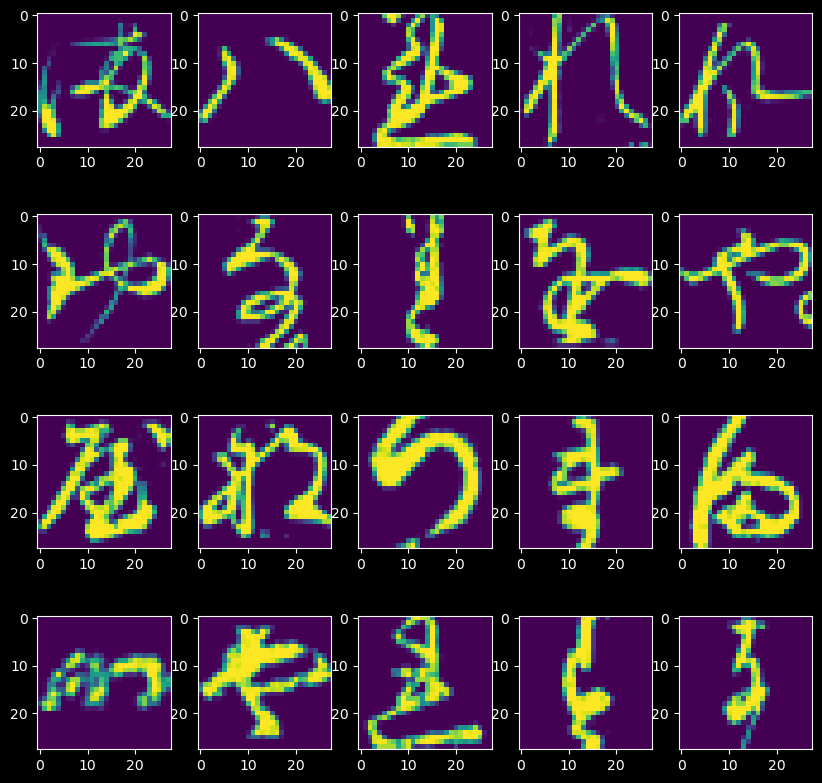

In [9]:
plt.figure(figsize=(10, 10))
for i in range(20):
    seed = None
    rng = np.random.default_rng(seed=seed)
    random_number = rng.integers(low=0,high=50000)
    kuzu_img = plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[random_number])

En esta celda, se llevan a cabo algunas transformaciones en los conjuntos de datos antes de ser utilizados para entrenar y probar el modelo:

1. "train_images" y "test_images" se normalizan dividiendo cada valor de píxel por 255. Esto se hace para escalar los valores de píxeles en el rango de 0 a 1, lo que facilita el procesamiento para el modelo de aprendizaje automático.

2. Luego, se modifica la forma de "train_images" y "test_images" para que sean compatibles con la entrada del modelo. Se cambia la forma de las matrices de 2D (28x28) a matrices de 3D (28x28x1), agregando una dimensión adicional que representa el número de canales de la imagen (en este caso, 1 canal porque son imágenes en escala de grises).

3. Las etiquetas de entrenamiento y prueba ("train_labels" y "test_labels") se convierten en forma de one-hot encoding utilizando la función "to_categorical" de Keras. Esto convierte las etiquetas enteras en vectores binarios de 10 dimensiones, donde cada dimensión representa una clase diferente. Esto es útil para entrenar un modelo de clasificación de múltiples clases.

En resumen, estas líneas de código normalizan las imágenes, ajustan sus formas y convierten las etiquetas en one-hot encoding, preparando los datos para su posterior uso en el entrenamiento del modelo de aprendizaje automático.

In [10]:
train_images = train_images.astype('float32') / 255 
test_images =  test_images.astype('float32') / 255 

train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

In [11]:
train_images.shape

(60000, 28, 28, 1)

En esta celda, se define la arquitectura del modelo de red neuronal convolucional utilizando la interfaz secuencial de Keras:
- Una capa de convolución con 64 filtros, tamaño de kernel 2x2, padding 'same' y función de activación ReLU. La capa espera una entrada de imágenes en formato (28x28x1).
- Una capa de MaxPooling con tamaño de pool 2x2 para reducir la dimensionalidad espacial.
- Una capa de dropout con una tasa de abandono del 30% para evitar el sobreajuste.
- Acá se agrega una capa adicional de convolución o más de una en función del parámetro 'convolution_deep'
  - Por defecto se agrega como mínimo una segunda capa de convolución con 32 filtros, tamaño de kernel 2x2, padding 'same' y función de activación ReLU.
  - Otra capa de MaxPooling y Dropout similar a las anteriores.
  - En caso de que convolution_deep sea 2, se agrega otra capa más, esta vez con la cantidad de filtros dividida entre dos, otra capa de Max Pooling y Dropout, de agregar una tercera capa o más, se sigue dividiendo entre dos la cantidad de filtros.
- Se aplana (Flatten) la salida de las capas anteriores para convertirla en un vector unidimensional.
- Una capa densamente conectada con 256 unidades y función de activación ReLU.
- Una capa de dropout con una tasa de abandono del 50%.
- Finalmente, una capa de salida con 10 unidades y función de activación softmax.

In [21]:
model1 = kminst_model(convolution_deep=1)
model2 = kminst_model(convolution_deep=2)
model3 = kminst_model(convolution_deep=3)


Este código a continuación configura el modelo para que utilice la función de pérdida categorical_crossentropy, el optimizador rmsprop y la métrica de precisión durante el entrenamiento.

In [22]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model2.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model3.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


Se almacena el historico del entrenamiento del modelo

In [23]:
hist1 = model1.fit(train_images, train_labels, batch_size=64, epochs=10)
hist2 = model2.fit(train_images, train_labels, batch_size=64, epochs=10)
hist3 = model3.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4835 - accuracy: 0.8489
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2078 - accuracy: 0.9370
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1592 - accuracy: 0.9513
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1400 - accuracy: 0.9581
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1314 - accuracy: 0.9610
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1296 - accuracy: 0.9629
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1290 - accuracy: 0.9628
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1262 - accuracy: 0.9635
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1252 - accuracy: 0.9641
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1246 - accuracy: 0.9639

In [24]:
print(model1.evaluate(test_images, test_labels, verbose=0)[1])
print(model2.evaluate(test_images, test_labels, verbose=0)[1])
print(model3.evaluate(test_images, test_labels, verbose=0)[1])

0.9402999877929688
0.9088000059127808
0.5478000044822693


A continuación se expresa una gráfica del entrenamiento del modelo a lo largo de cada una de las épocas, se puede apreciar cómo la precisión va aumentando a medida que avanzan las épocas. No obstante, se demuestra que agregar más capas de convolución no asegura un mejor aprendizaje.

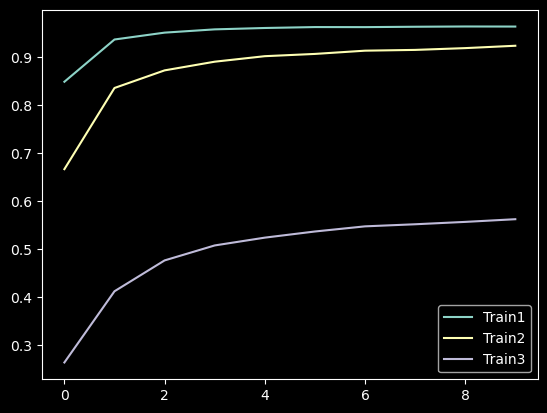

In [25]:
plt.plot(hist1.history['accuracy'], label='Train1')
plt.plot(hist2.history['accuracy'], label='Train2')
plt.plot(hist3.history['accuracy'], label='Train3')
plt.legend()
plt.show()

In [ ]:
model.layers

In [ ]:

output_layer = model.get_layer("conv2d").output
feature_model = tf.keras.Model(model.input, output_layer)

In [ ]:
feature_model.predict(np.expand_dims(train_images[13],axis=0))

1/1 [==============================] - 0s 92ms/step


array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    